# Guided Project: Building a Handwritten Digits Classifier

## Introduction

In this Guided Project, we'll build models that can classify handwritten digits.
We will start by implementing a traditional K-Nearest Neighbors model and then implement a deep, feedforward neural network with increasing numbers of neurons and layers.

## Librairies and Modules Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

## The Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the hand-written digits dataset from UCI.

Let's start by loading the dataset!

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

We transform the `data` 2D array into a Pandas dataframe and check the first few rows.

In [3]:
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Each row corresponds to an image and each column to a pixel of that image.
We can see that there are 64 columns in total, meaning images in our dataset are stored in a resolution of 8x8 pixels. The 8 lines of 8 pixel values constituting our images are simply stored one after another in a row.

These images were downsampled to lower resolutions and transformed to grayscale. Each pixel is represented as a brightness value ranging from 0 to 256.

We then transform the `target` array into a Pandas series. These values correspond to the number (from 0 to 9) displayed on each image.

In [4]:
labels = pd.Series(digits['target'])
labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64

To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels) and plot it on a coordinate grid.

Let's start by plotting the first image of the dataset!

In [5]:
first_image = data.iloc[0].values
first_image = first_image.reshape(8,8)
first_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

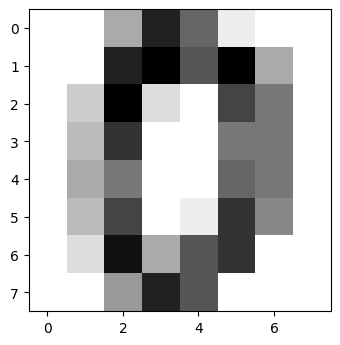

In [6]:
plt.imshow(first_image, cmap='gray_r')

The first image in the dataset represents a zero. Let's plot a few more images!

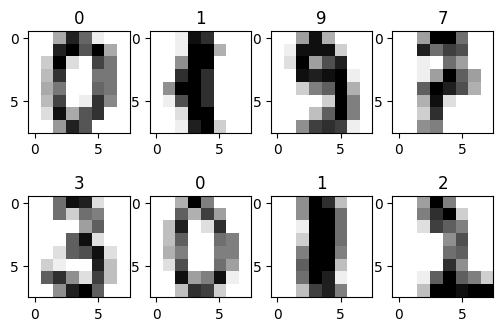

In [7]:
image_1 = data.iloc[0].values.reshape(8,8)
label_image_1 = labels.iloc[0]
image_100 = data.iloc[99].values.reshape(8,8)
label_image_100 = labels.iloc[99]
image_200 = data.iloc[199].values.reshape(8,8)
label_image_200 = labels.iloc[199]
image_300 = data.iloc[299].values.reshape(8,8)
label_image_300 = labels.iloc[299]
image_1000 = data.iloc[999].values.reshape(8,8)
label_image_1000 = labels.iloc[999]
image_1100 = data.iloc[1099].values.reshape(8,8)
label_image_1100 = labels.iloc[1099]
image_1200 = data.iloc[1199].values.reshape(8,8)
label_image_1200 = labels.iloc[1199]
image_1300 = data.iloc[1299].values.reshape(8,8)
label_image_1300 = labels.iloc[1299]

fig, ax = plt.subplots(2,4)
ax[0,0].set_title(label_image_1)
ax[0,0].imshow(image_1, cmap='gray_r')
ax[0,1].set_title(label_image_100)
ax[0,1].imshow(image_100, cmap='gray_r')
ax[0,2].set_title(label_image_200)
ax[0,2].imshow(image_200, cmap='gray_r')
ax[0,3].set_title(label_image_300)
ax[0,3].imshow(image_300, cmap='gray_r')
ax[1,0].set_title(label_image_1000)
ax[1,0].imshow(image_1000, cmap='gray_r')
ax[1,1].set_title(label_image_1100)
ax[1,1].imshow(image_1100, cmap='gray_r')
ax[1,2].set_title(label_image_1200)
ax[1,2].imshow(image_1200, cmap='gray_r')
ax[1,3].set_title(label_image_1300)
ax[1,3].imshow(image_1300, cmap='gray_r')

With such a low resolution, it is even difficult for a human to distinguish certain numbers.

Let's first see how a traditional machine learning algorithm does at this job!

## K-Nearest Neighbors

We decide to implement a simple k-nearest neighbors algorithm to start with.

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm makes no such assumptions. This allows them to capture nonlinearity in the data.

In the following block of code, we create three functions to handle the cross-validation splits, the training step and the prediction and evaluation step.

We decide to fix the number of splits to 4 for the cross-validation. We leave the number of nearest neighbors as an input parameter of the main function (`cross_validate_knn`) to experiment different values.

In [8]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test_knn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    overall_accuracy = sum(test_labels == predictions)/len(test_labels)
    return overall_accuracy
    
def cross_validate_knn(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test_knn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

one_neighbor_accuracy = cross_validate_knn(1)
np.mean(one_neighbor_accuracy)

0.9888728037614452

We get a pretty decent accuracy, even with only one neighbor. Let's try with more neighbors to see if we can improve the accuracy further.

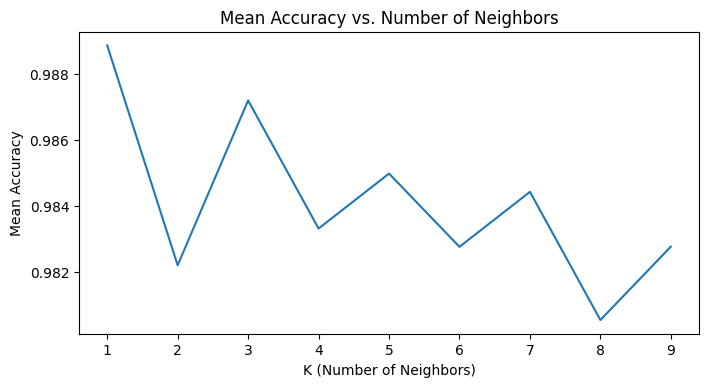

In [9]:
k_values = range(1,10)
k_overall_accuracies = []

for k in k_values:
    overall_accuracy = cross_validate_knn(k)
    k_overall_accuracies.append(np.mean(overall_accuracy))
    
plt.figure(figsize=(8,4))
plt.plot(k_values, k_overall_accuracies)
plt.title('Mean Accuracy vs. Number of Neighbors')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.show()

Increasing the number of neighbors yielded a drop in accuracy.

Even though this algorithm seems to do the job, we can list two downsides to using it:
* it uses a lot of memory and computational ressource (each new unseen observation needs to be compared to all of the seen observations)
* we don't have a model representation to debug and explore

We decide to try next with a deep, feed-forward neural network model and see how it compares.

## Neural Network Model

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

We want to assess the effectiveness of neural network models on this handwritten digits classifying task.

The pipeline of functions used below follows the same logic as previously and we will use it for the rest of this project as we try more complex networks.

In [10]:
def train_nn(neuron_arch, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=neuron_arch)
    nn.fit(train_features, train_labels)
    return nn

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    overall_accuracy = sum(test_labels == predictions)/len(test_labels)
    return overall_accuracy

def cross_validate_nn(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

### One Hidden Layer

We start by training and evaluating the performance of a network with a single hidden layer. We vary the number of neurons in this layer and plot the evolution of the accuracy.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

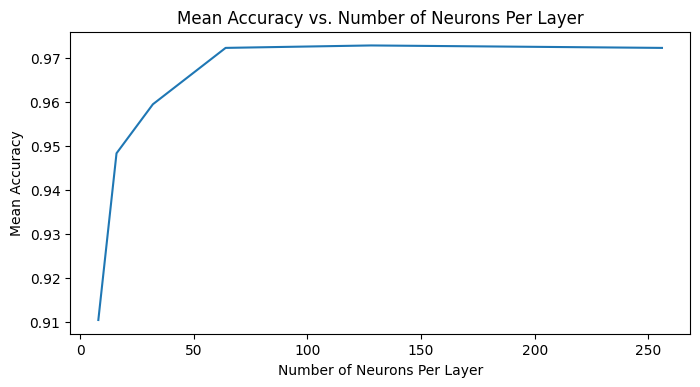

In [11]:
one_layer_architectures = [(8,), (16,), (32,), (64,), (128,), (256,)]

one_layer_accuracies = []

for architecture in one_layer_architectures:
    accuracy = cross_validate_nn(architecture)
    one_layer_accuracies.append(np.mean(accuracy))
    
neurons_number = [i[0] for i in one_layer_architectures]

plt.figure(figsize=(8,4))
plt.plot(neurons_number, one_layer_accuracies)
plt.title('Mean Accuracy vs. Number of Neurons Per Layer')
plt.xlabel('Number of Neurons Per Layer')
plt.ylabel('Mean Accuracy')
plt.show()

The accuracy increases sharply as we add more neurons to the single layer up to 32 or 64 neurons. But it then increases more smoothly until reaching a peak around 0.98 with 256 neurons.

The more neurons, the more processing ressource is required. The gain in accuracy between the configurations with 32 or 64 neurons and 256 neurons is relatively small and needs to be balanced with the additional ressources required.

Overall, the accuracy is near the one obtained with a k-nearest neighbors algorithm so there isn't any advantage to using a single hidden layer neural network here. Let's now try with two hidden layers!

### Two Hidden Layers

We increase the number of hidden layers to two. Each layer has the same number of neurons. As previously, we evaluate the network with an increasing number of neurons.

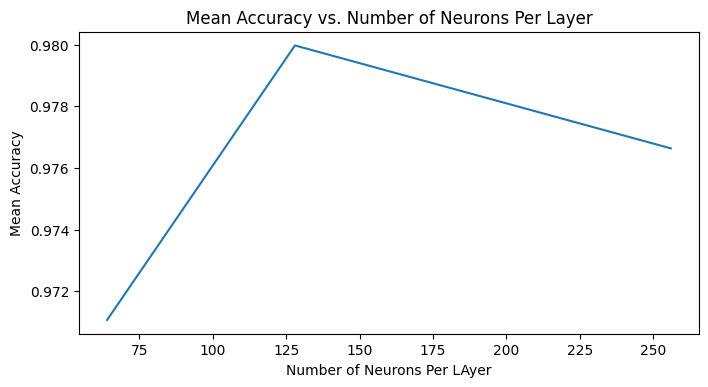

In [12]:
two_layers_architectures = [(64,64), (128,128), (256,256)]

two_layers_accuracies = []

for architecture in two_layers_architectures:
    accuracy = cross_validate_nn(architecture)
    two_layers_accuracies.append(np.mean(accuracy))
    
neurons_number = [i[0] for i in two_layers_architectures]

plt.figure(figsize=(8,4))
plt.plot(neurons_number, two_layers_accuracies)
plt.title('Mean Accuracy vs. Number of Neurons Per Layer')
plt.xlabel('Number of Neurons Per LAyer')
plt.ylabel('Mean Accuracy')
plt.show()

Using two hidden layers compared to one improved the maximum accuracy slightly. 

Finally, we try with three hidden layers.

### Three Hidden Layers

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



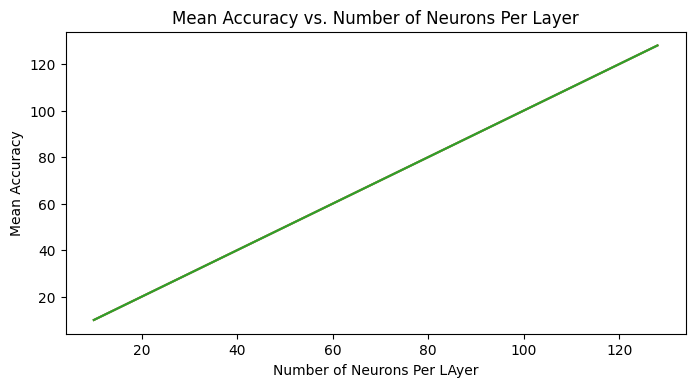

In [13]:
three_layers_architectures = [(10,10,10), (64,64,64), (128,128,128)]

three_layers_accuracies = []

for architecture in three_layers_architectures:
    accuracy = cross_validate_nn(architecture)
    three_layers_accuracies.append(np.mean(accuracy))
    
neurons_number = [i[0] for i in three_layers_architectures]

plt.figure(figsize=(8,4))
plt.plot(neurons_number, three_layers_architectures)
plt.title('Mean Accuracy vs. Number of Neurons Per Layer')
plt.xlabel('Number of Neurons Per LAyer')
plt.ylabel('Mean Accuracy')
plt.show()

Even with three hidden layers, the accuracy is not significantly higher than the one obtained with a traditional k-nearest neighbors algorithm.

## Conclusion

In this guided project, we experimented with different models to classify handwritten digits. We first implemented a traditional machine learning algorithm and later trained and evaluated deep, feed-forward neural networks with different numbers of hidden layers and neurons.

The accuracy obtained for the more complex neural networks was not significantly higher than that of the traditional algorithm. However, we only looked at simple accuracy, which doesn't tell us anything about false or true positives or false or true negatives.

Below are some possible next steps to go further:
* Use the existing pipeline we've built to try other machine learning models.
    * Decision Tree Models
    * Random Forest Models
* Experiment with different activation functions for the neural network models to see if it improves the accuracy.
* Research some techniques for visualizing weights in neural network models and add a visualization step to our pipeline.
* ...
